# 🤙 Pose Classification Kit: Hand pose classification model creation

This Notebook can be used to create Neural Network classifiers running in the [Pose Classification Kit](https://github.com/ArthurFDLR/pose-classification-kit).

First, we have to import several libraries to create and train a new model.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import os

try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    %tensorflow_version 2.x
    !pip install pose-classification-kit
    
import tensorflow
from tensorflow import keras
from pose_classification_kit.datasets import handDataset

print('Available GPU:')
!nvidia-smi -L
print('\nTensorFlow use GPU at: {}'.format(tensorflow.test.gpu_device_name()))

Available GPU:
GPU 0: GeForce RTX 2060 with Max-Q Design (UUID: GPU-63f90f3a-1a62-5290-ce48-ec73cce8a7ae)

TensorFlow use GPU at: /device:GPU:0


## Import dataset

In [8]:
dataset = handDataset(testSplit=.2, shuffle=True, handID=1)
x_train = dataset['x_train']
y_train = dataset['y_train_onehot']
labels = dataset['labels']

x_train.shape, y_train.shape

Dataset loaded from https://raw.githubusercontent.com/ArthurFDLR/pose-classification-kit/master/pose_classification_kit/datasets/HandPose_Dataset.csv


((4347, 42), (4347, 27))

## Models exploration

This section is optional. The following blocks can be used to compare different model architecture and training processes.

In [9]:
model_train_history = {}
input_dim = x_train.shape[1]
validation_split = 0.20
epochs = 15

In [11]:
model = keras.models.Sequential(name = 'ANN-3x16',
    layers =
    [
        keras.layers.InputLayer(input_shape=input_dim),
        keras.layers.Dense(16, activation=keras.activations.relu),
        keras.layers.Dense(16, activation=keras.activations.relu),
        keras.layers.Dense(16, activation=keras.activations.relu),
        keras.layers.Dense(len(labels), activation=keras.activations.softmax),
    ]
)

model.summary()
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

model_train_history[model] = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    batch_size=4,
    validation_split=validation_split,
    shuffle=True,
    verbose=1,
)

Model: "ANN-3x16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                688       
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_10 (Dense)             (None, 27)                459       
Total params: 1,691
Trainable params: 1,691
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
870/870 [==============================] - 2s 3ms/step - loss: 1.9592 - accuracy: 0.4567 - val_loss: 0.7188 - val_accuracy: 0.8425
Epoch 2/15
870/870 [==============================] - 2s 2ms/step - loss: 0.4739 - accuracy: 0.8712 - val_loss: 

In [12]:
model = keras.models.Sequential(name = 'ANN-3x64',
                                   layers =
    [
        keras.layers.InputLayer(input_shape=input_dim),
        keras.layers.Dense(64, activation=keras.activations.relu),
        keras.layers.Dense(64, activation=keras.activations.relu),
        keras.layers.Dense(64, activation=keras.activations.relu),
        keras.layers.Dense(len(labels), activation=keras.activations.softmax),
    ]
)

model.summary()
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

model_train_history[model] = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    batch_size=4,
    validation_split=validation_split,
    shuffle=True,
    verbose=1,
)

Model: "ANN-3x64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 64)                2752      
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 27)                1755      
Total params: 12,827
Trainable params: 12,827
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
870/870 [==============================] - 2s 2ms/step - loss: 0.8996 - accuracy: 0.7662 - val_loss: 0.0885 - val_accuracy: 0.9862
Epoch 2/15
870/870 [==============================] - 3s 3ms/step - loss: 0.0773 - accuracy: 0.9779 - val_loss

In [13]:
model = keras.models.Sequential(name = 'ANN-3x64-Dropouts',
                                   layers =
    [
        keras.layers.InputLayer(input_shape=input_dim),
        keras.layers.Dense(64, activation=keras.activations.relu),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(64, activation=keras.activations.relu),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(64, activation=keras.activations.relu),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(len(labels), activation=keras.activations.softmax),
    ]
)

model.summary()
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

model_train_history[model] = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    batch_size=4,
    validation_split=validation_split,
    shuffle=True,
    verbose=1,
)

Model: "ANN-3x64-Dropouts"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 64)                2752      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 27)          

In [14]:
model = keras.models.Sequential(name = 'ANN-2x128',
                                   layers =
    [
        keras.layers.InputLayer(input_shape=input_dim),
        keras.layers.Dense(128, activation=keras.activations.relu),
        keras.layers.Dense(128, activation=keras.activations.relu),
        keras.layers.Dense(len(labels), activation=keras.activations.softmax),
    ]
)

model.summary()
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

model_train_history[model] = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    batch_size=4,
    validation_split=validation_split,
    shuffle=True,
    verbose=1,
)

Model: "ANN-2x128"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 128)               5504      
_________________________________________________________________
dense_20 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_21 (Dense)             (None, 27)                3483      
Total params: 25,499
Trainable params: 25,499
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
870/870 [==============================] - 2s 3ms/step - loss: 0.7411 - accuracy: 0.8277 - val_loss: 0.0596 - val_accuracy: 0.9931
Epoch 2/15
870/870 [==============================] - 2s 2ms/step - loss: 0.0452 - accuracy: 0.9914 - val_loss: 0.0435 - val_accuracy: 0.9828
Epoch 3/15
870/870 [==============================] - 2s 2ms/step - loss: 0.0196 - accuracy: 0.9960

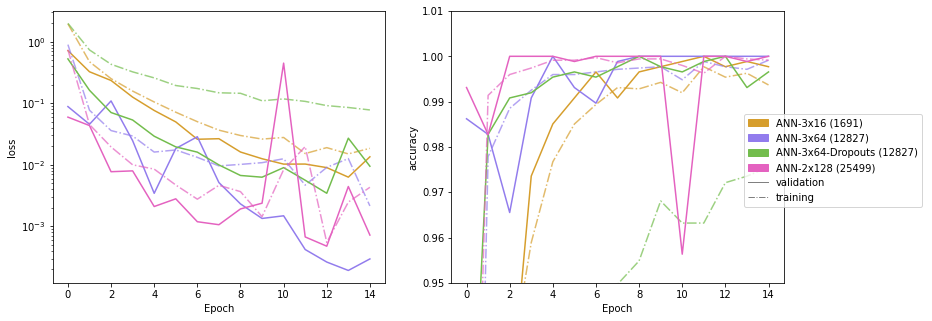

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(14,5))
colors_graph = ["#d69e2d",
                "#927ced",
                "#73bd4d",
                "#e462c0",
                "#eb5e52"]
handles = []

for (model, history), color in zip(model_train_history.items(), colors_graph):
    label = '{} ({})'.format(model.name, model.count_params())
    axs[0].plot(history.history['loss'], c=color, ls='-.', alpha=.7)
    axs[1].plot(history.history['accuracy'], c=color, ls='-.', alpha=.7)
    axs[0].plot(history.history['val_loss'], c=color)
    axs[1].plot(history.history['val_accuracy'], c=color)
    handles.append(mpatches.Patch(color=color, label=label))

for ax in axs:
    ax.set_xlabel('Epoch')
axs[0].set_ylabel('loss')
axs[0].set_yscale('log')
axs[1].set_ylabel('accuracy')
axs[1].set_ylim(0.95,1.01)

handles.append(Line2D([0], [0], color='grey', lw=1, ls='-', label='validation'))
handles.append(Line2D([0], [0], color='grey', lw=1, ls='-.', label='training'))

fig.subplots_adjust(right=0.85)
fig.legend(handles=handles,
           loc="center right",
           borderaxespad=1)

## Model export

Once you have a good model, you can save it on your Google Drive. The model is saved using the [folder hierarchy of OpenHand](https://github.com/ArthurFDLR/OpenHand-App#pose-classifier-models).

In [16]:
from pathlib import Path
import json

model_name = 'ANN_RightHand_1'

if IN_COLAB:
    content_path = Path('/').absolute() / 'content'
    drive_path = content_path / 'drive'
    google.colab.drive.mount(str(drive_path))
    save_path = drive_path / 'My Drive'
    
    for subfolder in ['Pose Classification Kit', 'Models', model_name]:
        save_path /= subfolder
        if not (save_path).is_dir():
            %mkdir "{save_path}"
else:
    save_path = Path('.').absolute() / model_name
    %mkdir "{save_path}"

model_path = save_path / '{name}.h5'.format(name = model_name)

In [17]:
model = keras.models.Sequential(name = '27Class_3x64',
                                   layers =
    [
        keras.layers.InputLayer(input_shape=input_dim),
        keras.layers.Dense(64, activation=keras.activations.relu),
        keras.layers.Dense(64, activation=keras.activations.relu),
        keras.layers.Dense(64, activation=keras.activations.relu),
        keras.layers.Dense(len(labels), activation=keras.activations.softmax),
    ]
)

model.summary()
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

model.fit(
    x=x_train,
    y=y_train,
    epochs=10,
    batch_size=4,
    validation_split=0.15,
    shuffle=True,
    callbacks=[keras.callbacks.ModelCheckpoint(filepath=model_path, verbose=1, save_best_only=True)],
    verbose = 2,
)

with open(save_path / 'class.json', 'w') as f:
    json.dump({'labels':labels}, f)

Model: "27Class_3x64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 64)                2752      
_________________________________________________________________
dense_23 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_24 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_25 (Dense)             (None, 27)                1755      
Total params: 12,827
Trainable params: 12,827
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10

Epoch 00001: val_loss improved from inf to 0.10254, saving model to C:\Users\ArthF\Documents\Projects\pose-classification-kit\examples\ANN_RightHand_1\ANN_RightHand_1.h5
924/924 - 2s - loss: 0.8606 - accuracy: 0.7704 - val_loss: 0.1025 

In [18]:
model = keras.models.load_model(model_path)
model.evaluate(x=dataset['x_test'], y=dataset['y_test_onehot'])

34/34 [==============================] - 0s 2ms/step - loss: 0.0069 - accuracy: 0.9981


[0.006858584005385637, 0.9981481432914734]